# House Price Predictor Using Neural Network

Data Source:- Kaggel

# The steps taken to create model:
    1.Data Cleaning :
        It includes missing data treatment ,excluding unwanted data
    2.Checking Skewness in data and treating it with log function
    3.Standardisation of data :
        For Categorical data One Hot Encoding is used
        For Continuous data MinMaxScalar is used
    4.NN Model creation
    5.Performance metrics used here is Mean Squared Error.

In [48]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [49]:
from warnings import filterwarnings
filterwarnings('ignore')

In [50]:
train =pd.read_csv('C:/Users/cmscomputers/Downloads/Skype/training_set.csv')

In [51]:
train.drop('Id',axis=1)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [52]:
train.isna().sum().sort_values(ascending=False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
Id                 0
dtype: int64

In [53]:
train=train.drop(['PoolQC','MiscFeature','Alley','Fence'],axis=1)

In [54]:
train.isna().sum().sort_values(ascending=False).head(20)

FireplaceQu     690
LotFrontage     259
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
BsmtExposure     38
BsmtFinType2     38
BsmtQual         37
BsmtCond         37
BsmtFinType1     37
MasVnrArea        8
MasVnrType        8
Electrical        1
KitchenAbvGr      0
BedroomAbvGr      0
HalfBath          0
FullBath          0
BsmtHalfBath      0
dtype: int64

In [55]:
for i in train:
    if(train[i].dtypes=='object'):
        c=train[i].mode()[0]
        train[i]=train[i].fillna(c)         
    else:
        c=train[i].mean()
        train[i]=train[i].fillna(c)  

In [56]:
train.isna().sum().sort_values(ascending=False)

Id             0
HalfBath       0
FireplaceQu    0
Fireplaces     0
Functional     0
              ..
MasVnrArea     0
MasVnrType     0
Exterior2nd    0
Exterior1st    0
SalePrice      0
Length: 77, dtype: int64

In [57]:
dftr=train.drop('Id',axis=1)

In [58]:
cat=[]
con=[]
for i in dftr:
    if(dftr[i].dtypes=='object'):
        cat.append(i)
    else:
        con.append(i)

# Skew treatment

In [59]:
dftr.skew().sort_values(ascending=False)

MiscVal          24.476794
PoolArea         14.828374
LotArea          12.207688
3SsnPorch        10.304342
LowQualFinSF      9.011341
KitchenAbvGr      4.488397
BsmtFinSF2        4.255261
ScreenPorch       4.122214
BsmtHalfBath      4.103403
EnclosedPorch     3.089872
MasVnrArea        2.676412
LotFrontage       2.384950
OpenPorchSF       2.364342
SalePrice         1.882876
BsmtFinSF1        1.685503
WoodDeckSF        1.541376
TotalBsmtSF       1.524255
MSSubClass        1.407657
1stFlrSF          1.376757
GrLivArea         1.366560
BsmtUnfSF         0.920268
2ndFlrSF          0.813030
OverallCond       0.693067
TotRmsAbvGrd      0.676341
HalfBath          0.675897
Fireplaces        0.649565
BsmtFullBath      0.596067
OverallQual       0.216944
MoSold            0.212053
BedroomAbvGr      0.211790
GarageArea        0.179981
YrSold            0.096269
FullBath          0.036562
GarageCars       -0.342549
YearRemodAdd     -0.503562
YearBuilt        -0.613461
GarageYrBlt      -0.668175
d

In [60]:
skewed=['MiscVal','PoolArea','LotArea','3SsnPorch','LowQualFinSF','KitchenAbvGr','BsmtFinSF2','ScreenPorch','BsmtHalfBath','EnclosedPorch']

#features with skwe >2

In [61]:
(dftr[skewed]==0).sum()

MiscVal          1408
PoolArea         1453
LotArea             0
3SsnPorch        1436
LowQualFinSF     1434
KitchenAbvGr        1
BsmtFinSF2       1293
ScreenPorch      1344
BsmtHalfBath     1378
EnclosedPorch    1252
dtype: int64

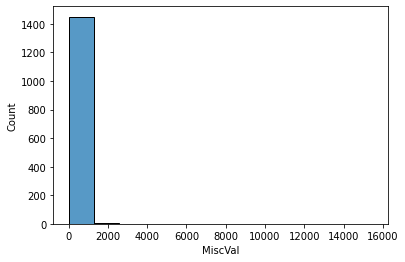

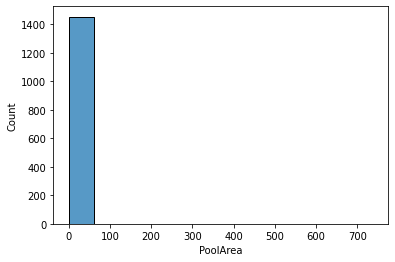

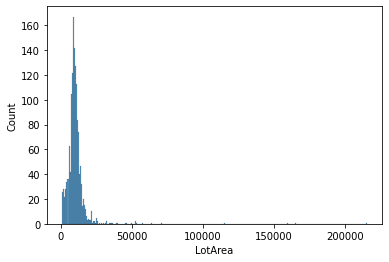

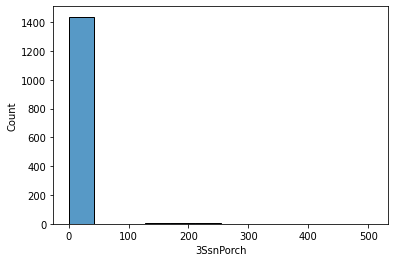

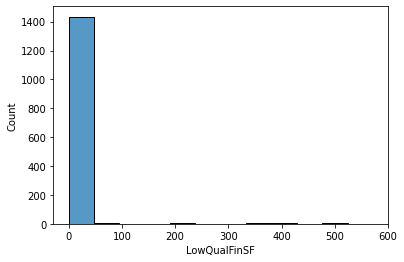

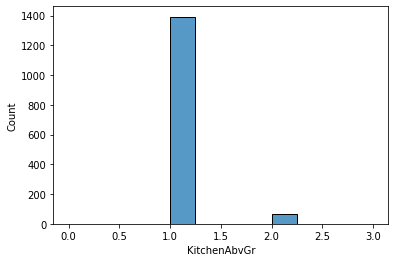

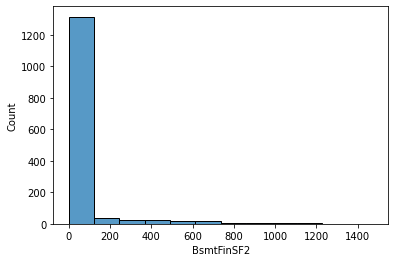

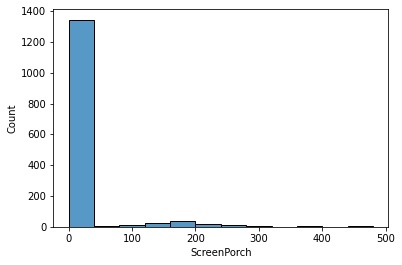

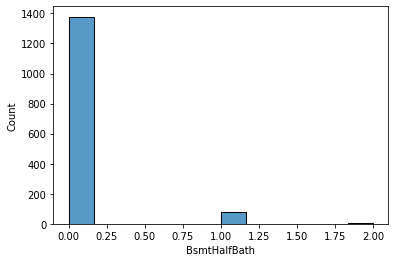

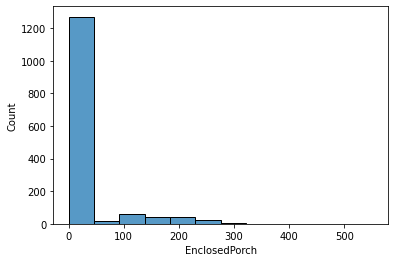

In [62]:
for i in skewed:
    sb.histplot(dftr[i])
    plt.show()

In [63]:
def skew_rem(df,col):
    q = []
    for i in df[col]:
        if(i != 0):
            q.append(np.log(i))
        else:
            q.append(i)
    df[col] = q

In [64]:
for i in skewed:
    skew_rem(dftr,i)

In [65]:
dftr.skew().sort_values(ascending=False)

BsmtHalfBath     26.990701
PoolArea         14.363144
3SsnPorch         7.737554
LowQualFinSF      7.462312
MiscVal           5.171227
KitchenAbvGr      4.441196
ScreenPorch       3.150990
MasVnrArea        2.676412
BsmtFinSF2        2.524777
LotFrontage       2.384950
OpenPorchSF       2.364342
EnclosedPorch     2.113838
SalePrice         1.882876
BsmtFinSF1        1.685503
WoodDeckSF        1.541376
TotalBsmtSF       1.524255
MSSubClass        1.407657
1stFlrSF          1.376757
GrLivArea         1.366560
BsmtUnfSF         0.920268
2ndFlrSF          0.813030
OverallCond       0.693067
TotRmsAbvGrd      0.676341
HalfBath          0.675897
Fireplaces        0.649565
BsmtFullBath      0.596067
OverallQual       0.216944
MoSold            0.212053
BedroomAbvGr      0.211790
GarageArea        0.179981
YrSold            0.096269
FullBath          0.036562
LotArea          -0.137994
GarageCars       -0.342549
YearRemodAdd     -0.503562
YearBuilt        -0.613461
GarageYrBlt      -0.668175
d

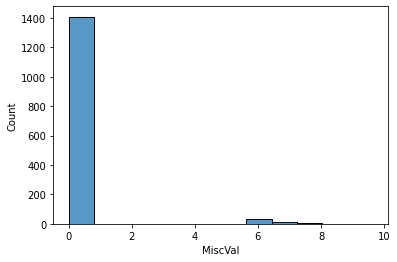

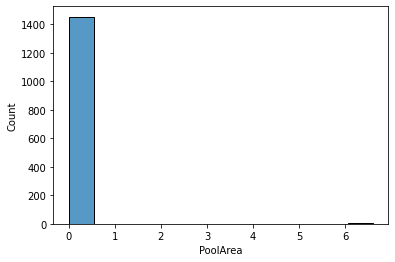

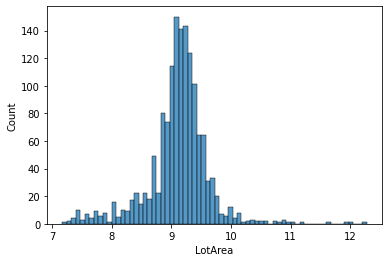

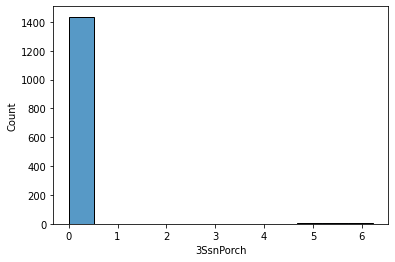

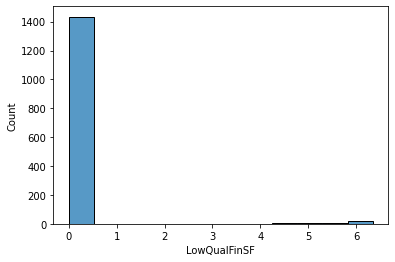

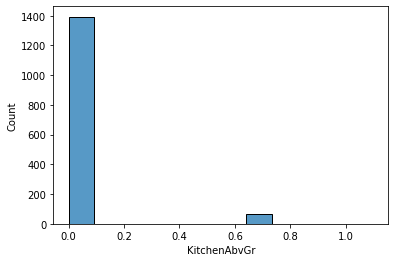

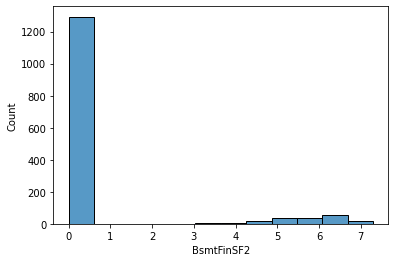

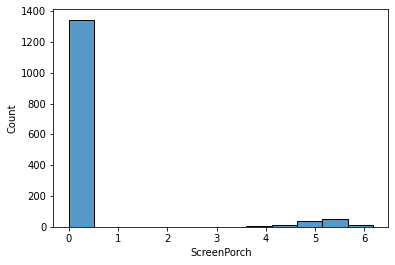

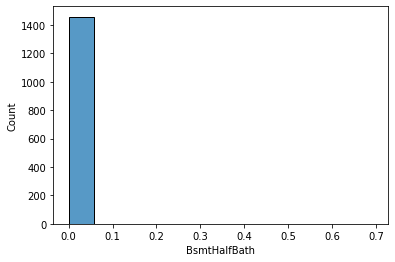

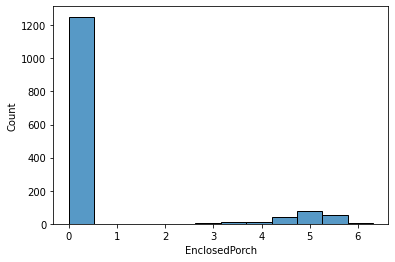

In [66]:
for i in skewed:
    sb.histplot(dftr[i])
    plt.show()

In [67]:
(dftr[skewed]==0).sum().sort_values(ascending=False)

BsmtHalfBath     1458
PoolArea         1453
3SsnPorch        1436
LowQualFinSF     1434
MiscVal          1408
KitchenAbvGr     1393
ScreenPorch      1344
BsmtFinSF2       1293
EnclosedPorch    1252
LotArea             0
dtype: int64

# Preparing Data For Model

In [70]:
x=dftr.drop('SalePrice',axis=1)
x

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,9.041922,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,61,0.000000,0.0,0.0,0.0,0.000000,2,2008,WD,Normal
1,20,RL,80.0,9.169518,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0.000000,0.0,0.0,0.0,0.000000,5,2007,WD,Normal
2,60,RL,68.0,9.328123,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,42,0.000000,0.0,0.0,0.0,0.000000,9,2008,WD,Normal
3,70,RL,60.0,9.164296,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,35,5.605802,0.0,0.0,0.0,0.000000,2,2006,WD,Abnorml
4,60,RL,84.0,9.565214,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,84,0.000000,0.0,0.0,0.0,0.000000,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,8.976768,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,40,0.000000,0.0,0.0,0.0,0.000000,8,2007,WD,Normal
1456,20,RL,85.0,9.486076,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0.000000,0.0,0.0,0.0,0.000000,2,2010,WD,Normal
1457,70,RL,66.0,9.109636,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,60,0.000000,0.0,0.0,0.0,7.824046,5,2010,WD,Normal
1458,20,RL,68.0,9.181632,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,4.718499,0.0,0.0,0.0,0.000000,4,2010,WD,Normal


In [71]:
y=dftr[['SalePrice']]
y

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
...,...
1455,175000
1456,210000
1457,266500
1458,142125


In [72]:
con.remove('SalePrice')

In [73]:
xcat=pd.DataFrame(x[cat])
xcat=pd.get_dummies(xcat)

In [74]:
xcat

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1456,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1457,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1458,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [75]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
xcon=pd.DataFrame(mm.fit_transform(x[con]),columns=con)

In [76]:
xcon

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,0.235294,0.150685,0.366344,0.666667,0.500,0.949275,0.883333,0.122500,0.125089,0.000000,...,0.386460,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.0000,0.090909,0.50
1,0.000000,0.202055,0.391317,0.555556,0.875,0.753623,0.433333,0.000000,0.173281,0.000000,...,0.324401,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.0000,0.363636,0.25
2,0.235294,0.160959,0.422359,0.666667,0.500,0.934783,0.866667,0.101250,0.086109,0.000000,...,0.428773,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.0000,0.727273,0.50
3,0.294118,0.133562,0.390295,0.666667,0.500,0.311594,0.333333,0.000000,0.038271,0.000000,...,0.452750,0.000000,0.063985,0.887900,0.0,0.0,0.0,0.0000,0.090909,0.00
4,0.235294,0.215753,0.468761,0.777778,0.500,0.927536,0.833333,0.218750,0.116052,0.000000,...,0.589563,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.0000,1.000000,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.235294,0.140411,0.353592,0.555556,0.500,0.920290,0.833333,0.000000,0.000000,0.000000,...,0.324401,0.000000,0.073126,0.000000,0.0,0.0,0.0,0.0000,0.636364,0.25
1456,0.000000,0.219178,0.453273,0.555556,0.625,0.768116,0.633333,0.074375,0.139972,0.698182,...,0.352609,0.407235,0.000000,0.000000,0.0,0.0,0.0,0.0000,0.090909,1.00
1457,0.294118,0.154110,0.379597,0.666667,1.000,0.500000,0.933333,0.000000,0.048724,0.000000,...,0.177715,0.000000,0.109689,0.000000,0.0,0.0,0.0,0.8109,0.363636,1.00
1458,0.000000,0.160959,0.393688,0.444444,0.625,0.565217,0.766667,0.000000,0.008682,0.950739,...,0.169252,0.427071,0.000000,0.747361,0.0,0.0,0.0,0.0000,0.272727,1.00


In [77]:
x=pd.concat([xcon,xcat],axis=1)

In [78]:
x.shape

(1460, 275)

# Splitting Data in train and test

In [79]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=21)

# Creating a NN Model

In [80]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [121]:
nn=Sequential()
nn.add(Dense(600,input_dim=(275)))
nn.add(Dropout(0.1))

nn.add(Dense(1200))
nn.add(Dropout(0.2))

nn.add(Dense(1200))
nn.add(Dropout(0.2))

nn.add(Dense(1))


In [122]:
nn.compile(loss='mean_absolute_error')
model=nn.fit(xtrain,ytrain)

37/37 [==============================] - 3s 62ms/step - loss: 91331.8984


In [123]:
from sklearn.metrics import mean_squared_error
pred_tr=nn.predict(xtrain)
pred_ts=nn.predict(xtest)
tr_err=mean_squared_error(ytrain,pred_tr)
ts_err=mean_squared_error(ytest,pred_ts)

In [124]:
np.sqrt(tr_err)

62105.91090168342

In [125]:
np.sqrt(ts_err)

66164.13494999899

# New Model with Batch_size=40,Epochs=100,validation_split=0.2

In [137]:
model1=nn.fit(xtrain,ytrain,validation_split=0.2,batch_size=40,epochs=100)

Epoch 1/100
24/24 [==============================] - 2s 69ms/step - loss: 15910.4863 - val_loss: 18410.6719
Epoch 2/100
24/24 [==============================] - 2s 67ms/step - loss: 15882.4746 - val_loss: 15678.1719
Epoch 3/100
24/24 [==============================] - 2s 69ms/step - loss: 16074.8271 - val_loss: 14848.6230
Epoch 4/100
24/24 [==============================] - 2s 73ms/step - loss: 15645.6143 - val_loss: 16867.3809
Epoch 5/100
24/24 [==============================] - 2s 66ms/step - loss: 15454.7812 - val_loss: 15075.2354
Epoch 6/100
24/24 [==============================] - 2s 66ms/step - loss: 15797.3643 - val_loss: 16318.9785
Epoch 7/100
24/24 [==============================] - 2s 66ms/step - loss: 15897.4570 - val_loss: 15256.0430
Epoch 8/100
24/24 [==============================] - 2s 70ms/step - loss: 15482.7910 - val_loss: 14910.9502
Epoch 9/100
24/24 [==============================] - 2s 73ms/step - loss: 15488.1016 - val_loss: 15338.0986
Epoch 10/100
24/24 [========

In [138]:
from sklearn.metrics import mean_squared_error
pred_tr=nn.predict(xtrain)
pred_ts=nn.predict(xtest)
tr_err=mean_squared_error(ytrain,pred_tr)
ts_err=mean_squared_error(ytest,pred_ts)

In [139]:
np.sqrt(tr_err)

27048.780609745296

In [140]:
np.sqrt(ts_err)

33420.15529762007

# Preparing test data

In [155]:
test=pd.read_csv('C:/Users/cmscomputers/Downloads/Skype/testing_set.csv')

In [156]:
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [157]:
dfts=test.drop(['Id'],axis=1)

# Missing Data treatment

In [159]:
dfts.isna().sum().sort_values(ascending=False)

PoolQC           1456
MiscFeature      1408
Alley            1352
Fence            1169
FireplaceQu       730
                 ... 
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
SaleCondition       0
Length: 79, dtype: int64

In [163]:
for i in dfts:
    if(dfts[i].dtypes=='object'):
        c=dfts[i].mode()[0]
        dfts[i]=dfts[i].fillna(c)         
    else:
        c=dfts[i].mean()
        dfts[i]=dfts[i].fillna(c)  

# Skew treatment

In [164]:
dfts.skew().sort_values(ascending=False)

PoolArea         20.196888
MiscVal          20.075188
LowQualFinSF     16.167254
3SsnPorch        12.524216
EnclosedPorch     4.669172
KitchenAbvGr      4.079055
BsmtFinSF2        4.042727
ScreenPorch       3.788244
BsmtHalfBath      3.782454
LotArea           3.115217
OpenPorchSF       2.687779
MasVnrArea        2.546474
WoodDeckSF        2.130760
1stFlrSF          1.558195
MSSubClass        1.346690
BsmtFinSF1        1.166076
GrLivArea         1.130402
BsmtUnfSF         0.920231
2ndFlrSF          0.912883
TotRmsAbvGrd      0.842597
Fireplaces        0.819858
TotalBsmtSF       0.813868
LotFrontage       0.720188
HalfBath          0.714728
BsmtFullBath      0.650143
OverallCond       0.449165
BedroomAbvGr      0.436623
GarageArea        0.300342
FullBath          0.295839
MoSold            0.183022
OverallQual       0.181196
YrSold            0.168986
GarageCars       -0.107178
GarageYrBlt      -0.162765
YearRemodAdd     -0.399906
YearBuilt        -0.587657
dtype: float64

In [165]:
testskew=['PoolArea','MiscVal','LowQualFinSF','3SsnPorch','EnclosedPorch','KitchenAbvGr','BsmtFinSF2','ScreenPorch','BsmtHalfBath','LotArea']

In [166]:
for i in testskew:
    skew_rem(dfts,i)

In [167]:
dfts.skew().sort_values(ascending=False)

PoolArea         15.722442
3SsnPorch        10.544955
LowQualFinSF     10.320983
MiscVal           5.263137
KitchenAbvGr      4.459106
ScreenPorch       2.772147
OpenPorchSF       2.687779
MasVnrArea        2.546474
BsmtFinSF2        2.402512
WoodDeckSF        2.130760
EnclosedPorch     1.830218
1stFlrSF          1.558195
MSSubClass        1.346690
BsmtFinSF1        1.166076
GrLivArea         1.130402
BsmtUnfSF         0.920231
2ndFlrSF          0.912883
TotRmsAbvGrd      0.842597
Fireplaces        0.819858
TotalBsmtSF       0.813868
LotFrontage       0.720188
HalfBath          0.714728
BsmtFullBath      0.650143
OverallCond       0.449165
BedroomAbvGr      0.436623
GarageArea        0.300342
FullBath          0.295839
MoSold            0.183022
OverallQual       0.181196
YrSold            0.168986
GarageCars       -0.107178
GarageYrBlt      -0.162765
YearRemodAdd     -0.399906
YearBuilt        -0.587657
LotArea          -0.916037
BsmtHalfBath    -24.161727
dtype: float64

# Standadization of Data

In [170]:
tcats=pd.DataFrame(pd.get_dummies(dfts[cat]))

In [172]:
tcons=pd.DataFrame(mm.fit_transform(dfts[con]),columns=con)

In [173]:
t=pd.concat([tcons,tcats],axis=1)

In [193]:
t

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,Exterior1st_ImStucc,Exterior1st_Stone,Exterior2nd_Other,Heating_Floor,Heating_OthW,Electrical_Mix,GarageQual_Ex
0,0.000000,0.329609,0.566360,0.444444,0.625,0.625954,0.183333,0.000000,0.116708,0.677973,...,0,0,0,0,0,0,0,0,0,0
1,0.000000,0.335196,0.622527,0.555556,0.625,0.603053,0.133333,0.083721,0.230175,0.000000,...,0,0,0,0,0,0,0,0,0,0
2,0.235294,0.296089,0.614005,0.444444,0.500,0.900763,0.800000,0.000000,0.197257,0.000000,...,0,0,0,0,0,0,0,0,0,0
3,0.235294,0.318436,0.524583,0.555556,0.625,0.908397,0.800000,0.015504,0.150125,0.000000,...,0,0,0,0,0,0,0,0,0,0
4,0.588235,0.122905,0.335596,0.777778,0.500,0.862595,0.700000,0.000000,0.065586,0.000000,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,0.823529,0.000000,0.075426,0.333333,0.750,0.694656,0.333333,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
1455,0.823529,0.000000,0.069418,0.333333,0.500,0.694656,0.333333,0.000000,0.062843,0.000000,...,0,0,0,0,0,0,0,0,0,0
1456,0.000000,0.776536,0.715051,0.444444,0.750,0.618321,0.766667,0.000000,0.305237,0.000000,...,0,0,0,0,0,0,0,0,0,0
1457,0.382353,0.229050,0.537007,0.444444,0.500,0.862595,0.700000,0.000000,0.084040,0.000000,...,0,0,0,0,0,0,0,0,0,0


In [174]:
t.shape

#As here no of features are not matching with no of features in model , we will create dummy features to match the no

(1459, 259)

In [175]:
col=x.columns

In [176]:
col

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=275)

In [177]:
col2=t.columns
col2

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=259)

In [179]:
t[col]

KeyError: "['Utilities_NoSeWa', 'Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn', 'HouseStyle_2.5Fin', 'RoofMatl_ClyTile', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll', 'Exterior1st_ImStucc', 'Exterior1st_Stone', 'Exterior2nd_Other', 'Heating_Floor', 'Heating_OthW', 'Electrical_Mix', 'GarageQual_Ex'] not in index"

In [180]:
col3=['Utilities_NoSeWa', 'Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn', 'HouseStyle_2.5Fin', 'RoofMatl_ClyTile', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll', 'Exterior1st_ImStucc', 'Exterior1st_Stone', 'Exterior2nd_Other', 'Heating_Floor', 'Heating_OthW', 'Electrical_Mix', 'GarageQual_Ex']

In [181]:
len(col3)

16

In [182]:
275-259

16

In [183]:
t[col3]=0

In [184]:
t.shape

(1459, 275)

In [194]:
x.shape

(1460, 275)

In [185]:
result=nn.predict(t)
result

array([[ 27801.207],
       [ 53452.027],
       [123743.86 ],
       ...,
       [103992.05 ],
       [ 12922.571],
       [198731.17 ]], dtype=float32)

In [186]:
sale=pd.DataFrame(result,columns=['Sale_price'])

In [187]:
sale

,Sale_price
0,27801.207031
1,53452.027344
2,123743.859375
3,140600.531250
4,113505.750000
...,...
1454,-37319.062500
1455,-46426.621094
1456,103992.046875
1457,12922.571289


In [188]:
price=test[['Id']]

In [189]:
price['Sale_Price']=sale

In [190]:
price

,Id,Sale_Price
0,1461,27801.207031
1,1462,53452.027344
2,1463,123743.859375
3,1464,140600.531250
4,1465,113505.750000
...,...,...
1454,2915,-37319.062500
1455,2916,-46426.621094
1456,2917,103992.046875
1457,2918,12922.571289


price.to_csv('House_price2',index=False)